## Treinamento de Idade do Gênero Masculino

Neste notebook treinar nossa rede para resolver o problema de classificação de idade considerando apenas o gênero masculino. Para isso iremos utilizar o framework [Keras](https://keras.io)

## Dependências

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.layers import normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

Using TensorFlow backend.


## Funções auxíliares

Iremos carregar implementar algumas funções para leitura e formatação dos dados de entrada pré processados no notebook anterior.

In [2]:
DATA_NAME = ['data_%d' % i for i in range(5)]

In [3]:
def load(name):
    with open(name+'.pkl', 'rb') as f:
        return pkl.load(f)

def wrapper_data(name):
    imagens = []
    labels = []
    for data in DATA_NAME:
        obj = load(name+data)
        for x, y in zip(obj['imagens'], obj['labels']):
            imagens.append(x)
            labels.append(y)
    return np.array(imagens, dtype=np.float16),  np.array(labels, dtype=np.uint16) 

## Arquitetura

![arch](images/test1.png)

### Modelo

In [4]:
model = Sequential()

model.add(Conv2D(filters=64,
                 kernel_size=(5,5),
                 padding='same',
                 strides=(4,4),
                 input_shape=(227,227,3)))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=128,
                 kernel_size=(5,5),
                 padding='same'))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),  padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(8, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 57, 57, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 57, 57, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 128)       0         
__________

### Hiper-parâmetros

In [5]:
BATCH_SIZE = 64
EPOCHS = 100

In [6]:
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

### Entrada 

In [7]:
# carrega dados
X, y = wrapper_data('serializer/age-male/')
# separa dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_oh_train = to_categorical(y_train, 8)
y_oh_test = to_categorical(y_test, 8)

X_train.shape, X_test.shape, y_oh_train.shape, y_oh_test.shape

((6229, 227, 227, 3), (1100, 227, 227, 3), (6229, 8), (1100, 8))

### Treino

In [8]:
hist = model.fit(x=X_train, y=y_oh_train, validation_split=0.1, batch_size=BATCH_SIZE, epochs=EPOCHS)
model.save('models/model_age_male.h5')

print('Train loss:', model.evaluate(X_train, y_oh_train, verbose=0))
print('Test loss:', model.evaluate(X_test, y_oh_test, verbose=0))

Train on 5606 samples, validate on 623 samples
Epoch 1/100
5606/5606 [==============================] - 168s 30ms/step - loss: 2.0150 - acc: 0.2827 - val_loss: 1.7778 - val_acc: 0.3451
Epoch 2/100
5606/5606 [==============================] - 197s 35ms/step - loss: 1.7870 - acc: 0.3375 - val_loss: 1.6871 - val_acc: 0.4238
Epoch 3/100
5606/5606 [==============================] - 109s 19ms/step - loss: 1.5440 - acc: 0.4167 - val_loss: 1.3988 - val_acc: 0.4671
Epoch 4/100
5606/5606 [==============================] - 103s 18ms/step - loss: 1.3762 - acc: 0.4663 - val_loss: 1.3174 - val_acc: 0.5169
Epoch 5/100
5606/5606 [==============================] - 105s 19ms/step - loss: 1.2681 - acc: 0.5161 - val_loss: 1.2445 - val_acc: 0.5538
Epoch 6/100
5606/5606 [==============================] - 114s 20ms/step - loss: 1.1877 - acc: 0.5471 - val_loss: 1.1406 - val_acc: 0.5778
Epoch 7/100
5606/5606 [==============================] - 111s 20ms/step - loss: 1.1052 - acc: 0.5735 - val_loss: 1.0868 - val

5606/5606 [==============================] - 118s 21ms/step - loss: 0.1477 - acc: 0.9479 - val_loss: 1.6393 - val_acc: 0.7095
Epoch 60/100
5606/5606 [==============================] - 117s 21ms/step - loss: 0.1491 - acc: 0.9463 - val_loss: 1.5864 - val_acc: 0.6966
Epoch 61/100
5606/5606 [==============================] - 118s 21ms/step - loss: 0.1289 - acc: 0.9531 - val_loss: 1.7518 - val_acc: 0.6870
Epoch 62/100
5606/5606 [==============================] - 117s 21ms/step - loss: 0.1283 - acc: 0.9508 - val_loss: 1.6922 - val_acc: 0.7143
Epoch 63/100
5606/5606 [==============================] - 116s 21ms/step - loss: 0.1400 - acc: 0.9522 - val_loss: 1.6584 - val_acc: 0.7175
Epoch 64/100
5606/5606 [==============================] - 117s 21ms/step - loss: 0.1336 - acc: 0.9529 - val_loss: 1.7911 - val_acc: 0.6822
Epoch 65/100
5606/5606 [==============================] - 117s 21ms/step - loss: 0.1363 - acc: 0.9538 - val_loss: 1.7027 - val_acc: 0.6950
Epoch 66/100
5606/5606 [================

In [9]:
y_pred = model.predict(X_test).argmax(axis=1)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Matriz de de confusão:\n', confusion_matrix(y_test, y_pred))

Acurácia: 0.6818181818181818
Matriz de de confusão:
 [[ 95   7   5   1   5   2   0   2]
 [ 14  91  14   2  12   1   0   0]
 [  1  22  74  12  13   6   2   0]
 [  0   0   6  55  22   5   0   0]
 [  1   1   3  13 247  30   3   2]
 [  0   0   5   6  51 130  12   3]
 [  1   0   1   2  11  17  17   5]
 [  0   0   0   0   4  19   6  41]]


Text(0.5,0,'epoch')

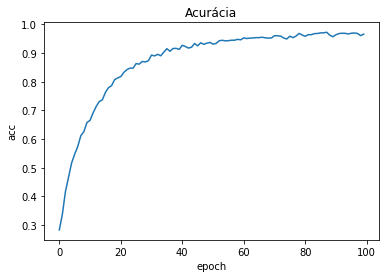

In [10]:
plt.plot(hist.history['acc'])
plt.title('Acurácia')
plt.ylabel('acc')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

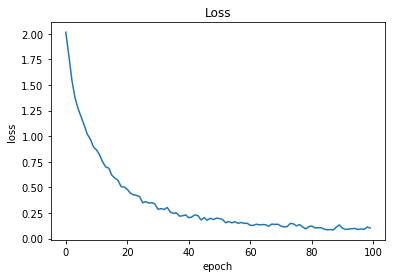

In [11]:
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')